In [1]:
import numpy as np
import matplotlib.pyplot as plt

def theta_rule(u0, lmda, tend, dt, theta):
    """
    Function for solving u' = \lambda u, u(0)= u0, on [0, tend] with steps of dt.
    """
    N = int(tend/dt)              # number of time intervals
    tend = N*dt                   # adjust tend  to fit time step dt
    u = np.zeros(N+1)             # array of u[k] values
    t = np.linspace(0, tend, N+1) # time mesh    
    u[0] = u0                     # assign the initial condition
    for k in range(0, N):
        u[k+1] = (1+(1-theta)*lmda*dt)/(1-theta*lmda*dt)*u[k]
    return u, t

In [2]:
# Exact solution
def u_exact(t, u0, lmda):
    return u0*np.exp(lmda*t)
u0 = 1
lmda = -1
tend = 3
dt = 0.3
theta = 1.0
u, t = theta_rule(u0, lmda, tend, dt, theta)
# Write out  a table of t and u values:   
for i in range(len(t)):
    print ('t = %6.3f u = %g' % (t[i], u[i]))  

t =  0.000 u = 1
t =  0.300 u = 0.769231
t =  0.600 u = 0.591716
t =  0.900 u = 0.455166
t =  1.200 u = 0.350128
t =  1.500 u = 0.269329
t =  1.800 u = 0.207176
t =  2.100 u = 0.159366
t =  2.400 u = 0.122589
t =  2.700 u = 0.0942996
t =  3.000 u = 0.0725382


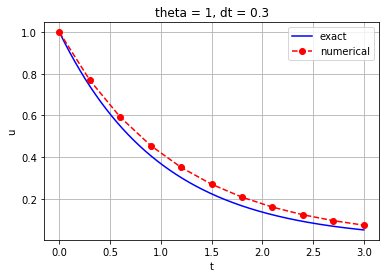

In [3]:
t_e = np.linspace(0, tend, 1001)       # fine mesh
u_e = u_exact(t_e, u0, lmda)
plt.plot(t_e, u_e, 'b-', t, u, 'r--o')
plt.xlabel('t')
plt.ylabel('u')
plt.legend(['exact', 'numerical'])
plt.title('theta = %g, dt = %g' % (theta, dt))
plt.grid()
plt.savefig('fig_theta.png', dpi=300, bbox_inches='tight')
plt.show() 